In [4]:
import os

def convert_list_to_rttm(list_folder, output_folder):
    os.makedirs(output_folder, exist_ok=True)

    for fname in os.listdir(list_folder):
        if not fname.endswith(".list"):
            continue

        list_path = os.path.join(list_folder, fname)
        rttm_path = os.path.join(output_folder, fname.replace(".list", ".rttm"))

        with open(list_path, 'r') as fin, open(rttm_path, 'w') as fout:
            for line in fin:
                line = line.strip()
                if not line or line.startswith('#'):
                    continue

                try:
                    start_time, end_time, speaker_id, path, *_ = line.split(maxsplit=5)
                    start_time = float(start_time)
                    end_time = float(end_time)
                    duration = end_time - start_time
                    assert duration > 0
                    recording_id = os.path.splitext(os.path.basename(list_path))[0]

                    rttm_line = f"SPEAKER {recording_id} 1 {start_time:.3f} {duration:.3f} <NA> <NA> {speaker_id} <NA> <NA>\n"
                    fout.write(rttm_line)
                except Exception as e:
                    print(f"Skipping line in {fname}: {line}")
                    print(f"Reason: {e}")
                    continue

        print(f"Converted: {fname} → {os.path.basename(rttm_path)}")

# === 修改此处路径 ===
list_folder = "/mmu-audio-ssd/zhenghaorui/others/SD/Large-scale-diarization-dataset/exp/exp1/samples"       # 存放 .list 文件的目录
output_folder = "/mmu-audio-ssd/zhenghaorui/others/SD/Large-scale-diarization-dataset/exp/exp1/gt" # 转换后的 .rttm 存放目录

convert_list_to_rttm(list_folder, output_folder)


Converted: 0000038_pre.list → 0000038_pre.rttm
Converted: 0000059_pre.list → 0000059_pre.rttm
Converted: 0000099_pre.list → 0000099_pre.rttm
Converted: 0000089_int.list → 0000089_int.rttm
Converted: 0000012_int.list → 0000012_int.rttm
Converted: 0000000_pre.list → 0000000_pre.rttm
Converted: 0000054_pre.list → 0000054_pre.rttm
Converted: 0000077_pre.list → 0000077_pre.rttm
Converted: 0000025_pre.list → 0000025_pre.rttm
Converted: 0000002_int.list → 0000002_int.rttm
Converted: 0000061_int.list → 0000061_int.rttm
Converted: 0000052_pre.list → 0000052_pre.rttm
Converted: 0000040_pre.list → 0000040_pre.rttm
Converted: 0000011_int.list → 0000011_int.rttm
Converted: 0000093_pre.list → 0000093_pre.rttm
Converted: 0000050_int.list → 0000050_int.rttm
Converted: 0000064_int.list → 0000064_int.rttm
Converted: 0000098_pre.list → 0000098_pre.rttm
Converted: 0000014_dis.list → 0000014_dis.rttm
Converted: 0000096_int.list → 0000096_int.rttm
Converted: 0000095_pre.list → 0000095_pre.rttm
Converted: 00

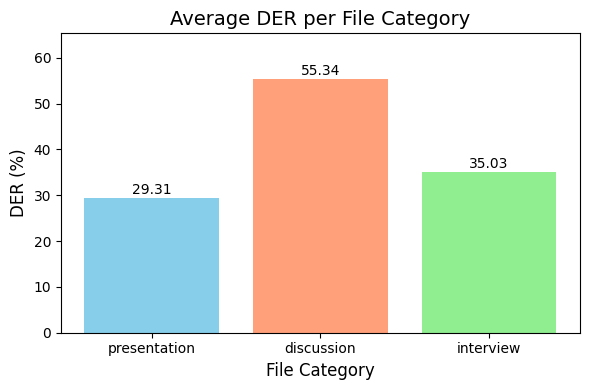

In [7]:
import matplotlib.pyplot as plt
from collections import defaultdict

# 读取路径
input_file = "/mmu-audio-ssd/zhenghaorui/others/SD/Large-scale-diarization-dataset/exp/exp1/der"  # 修改为你的文件名

# 初始化结构
category_der = defaultdict(list)

# 读取并分类
with open(input_file, "r") as f:
    lines = f.readlines()

# 跳过表头（前2行）
for line in lines[2:]:
    parts = line.strip().split()
    if len(parts) < 2:
        continue
    try:
        file_id = parts[0]
        der = float(parts[1])
        
        # 提取后缀类别
        if file_id.endswith("_pre"):
            category = "presentation"
        elif file_id.endswith("_dis"):
            category = "discussion"
        elif file_id.endswith("_int"):
            category = "interview"
        else:
            continue  # 跳过未知类别

        category_der[category].append(der)
    except:
        pass

# 计算平均值
category_avg = {cat: sum(values) / len(values) for cat, values in category_der.items()}

# 画图
categories = list(category_avg.keys())
averages = [category_avg[cat] for cat in categories]

plt.figure(figsize=(6, 4))
bars = plt.bar(categories, averages, color=["#87CEEB", "#FFA07A", "#90EE90"])
plt.title("Average DER per File Category", fontsize=14)
plt.xlabel("File Category", fontsize=12)
plt.ylabel("DER (%)", fontsize=12)
plt.ylim(0, max(averages) + 10)

# 添加数值标签
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f"{yval:.2f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()


{'0000000_pre': 30.48, '0000001_dis': 62.49, '0000002_int': 40.45, '0000003_pre': 11.24, '0000004_int': 44.53, '0000005_int': 13.5, '0000006_pre': 14.92, '0000007_int': 12.54, '0000008_pre': 73.47, '0000009_dis': 79.37, '0000010_pre': 10.56, '0000011_int': 43.84, '0000012_int': 33.68, '0000013_dis': 54.53, '0000014_dis': 105.71, '0000015_int': 65.72, '0000016_pre': 11.18, '0000017_pre': 15.22, '0000018_dis': 27.27, '0000019_dis': 20.9, '0000020_int': 9.77, '0000021_int': 49.34, '0000022_pre': 40.2, '0000023_int': 40.01, '0000024_int': 39.14, '0000025_pre': 32.09, '0000026_dis': 47.57, '0000027_dis': 21.6, '0000028_int': 10.86, '0000029_dis': 57.17, '0000030_dis': 20.26, '0000031_dis': 79.07, '0000032_int': 32.49, '0000033_int': 42.75, '0000034_int': 37.23, '0000035_dis': 118.38, '0000036_pre': 12.09, '0000037_dis': 44.86, '0000038_pre': 13.1, '0000039_pre': 10.11, '0000040_pre': 10.14, '0000041_pre': 53.24, '0000042_int': 53.32, '0000043_pre': 45.59, '0000044_int': 15.0, '0000045_int':

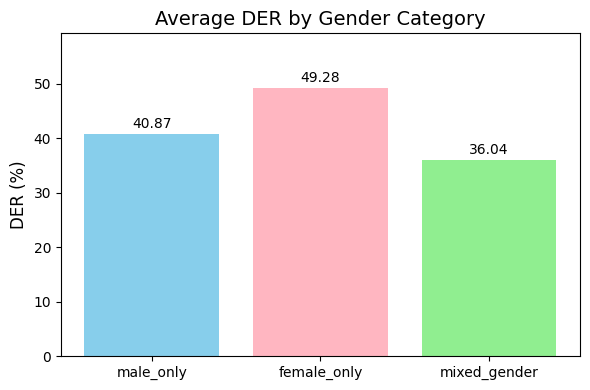

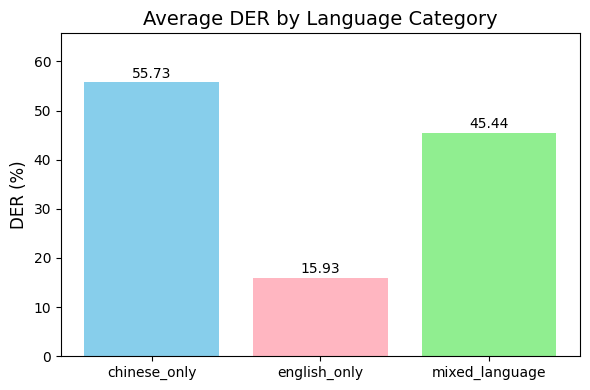

In [10]:
import os
import json
import matplotlib.pyplot as plt
from collections import defaultdict

# === 配置路径 ===

list_dir = "/mmu-audio-ssd/zhenghaorui/others/SD/Large-scale-diarization-dataset/exp/exp1/samples"  # your RTTM folder path
json_files = [
    "/mmu-audio-ssd/zhenghaorui/others/SD/Large-scale-diarization-dataset/metadata/Chinese/aishell-1/speakers_male.json",
    "/mmu-audio-ssd/zhenghaorui/others/SD/Large-scale-diarization-dataset/metadata/Chinese/aishell-1/speakers_female.json",
    "/mmu-audio-ssd/zhenghaorui/others/SD/Large-scale-diarization-dataset/metadata/English/librispeech/speakers_male.json",
    "/mmu-audio-ssd/zhenghaorui/others/SD/Large-scale-diarization-dataset/metadata/English/librispeech/speakers_female.json"
]
der_file = "/mmu-audio-ssd/zhenghaorui/others/SD/Large-scale-diarization-dataset/exp/exp1/der"                # DER 统计文件路径


# === 步骤 1: 加载 speaker_id 信息 ===
speaker_info = {}
for json_path in json_files:
    with open(json_path, 'r') as f:
        data = json.load(f)
        for entry in data:
            speaker_id = entry['speaker_id']
            gender = entry['gender'].lower()
            language = entry['language'].lower()
            speaker_info[speaker_id] = {'gender': gender, 'language': language}


# === 步骤 2: 加载 DER 数据 ===
file_der = {}
with open(der_file, 'r') as f:
    lines = f.readlines()[2:]  # 跳过前两行头部
    for line in lines:
        parts = line.strip().split()
        if len(parts) < 2:
            continue
        try:
            file_id = parts[0]
            der = float(parts[1])
            file_der[file_id] = der
        except: 
            pass
print(file_der)

# === 步骤 3: 分析每个 list 文件的 speaker 信息 ===
gender_groups = {'male_only': [], 'female_only': [], 'mixed_gender': []}
language_groups = {'chinese_only': [], 'english_only': [], 'mixed_language': []}

for file_id in file_der:
    list_path = os.path.join(list_dir, file_id + ".list")
    if not os.path.exists(list_path):
        print(f"List file not found: {list_path}")
        continue

    speaker_set = set()
    gender_set = set()
    language_set = set()

    with open(list_path, 'r') as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) < 3:
                continue
            speaker_id = parts[2]
            speaker_set.add(speaker_id)

    for spk in speaker_set:
        if spk not in speaker_info:
            print(f"Unknown speaker_id: {spk}")
            continue
        gender_set.add(speaker_info[spk]['gender'])
        language_set.add(speaker_info[spk]['language'])

    # 分类性别
    if gender_set == {'male'}:
        gender_groups['male_only'].append(file_der[file_id])
    elif gender_set == {'female'}:
        gender_groups['female_only'].append(file_der[file_id])
    else:
        gender_groups['mixed_gender'].append(file_der[file_id])

    # 分类语言
    if language_set == {'chinese'}:
        language_groups['chinese_only'].append(file_der[file_id])
    elif language_set == {'english'}:
        language_groups['english_only'].append(file_der[file_id])
    else:
        language_groups['mixed_language'].append(file_der[file_id])

# === 步骤 4: 计算平均 DER ===
def compute_avg(group_dict):
    return {k: sum(v)/len(v) if v else 0 for k, v in group_dict.items()}

gender_avg = compute_avg(gender_groups)
language_avg = compute_avg(language_groups)

# === 步骤 5: 画图 ===
def plot_bar(data_dict, title, ylabel):
    categories = list(data_dict.keys())
    values = [data_dict[k] for k in categories]
    plt.figure(figsize=(6, 4))
    bars = plt.bar(categories, values, color=['#87CEEB', '#FFB6C1', '#90EE90'])
    plt.title(title, fontsize=14)
    plt.ylabel(ylabel, fontsize=12)
    plt.ylim(0, max(values) + 10)
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f"{yval:.2f}", ha='center', fontsize=10)
    plt.tight_layout()
    plt.show()

# 性别分类图
plot_bar(gender_avg, "Average DER by Gender Category", "DER (%)")

# 语言分类图
plot_bar(language_avg, "Average DER by Language Category", "DER (%)")
